<a href="https://colab.research.google.com/github/msremigio/ML/blob/master/Fashion_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [84]:
trainImages = '/content/train-images-idx3-ubyte.gz'
trainLabels = '/content/train-labels-idx1-ubyte.gz'
testImages = '/content/t10k-images-idx3-ubyte.gz'
testLabels = '/content/t10k-labels-idx1-ubyte.gz'

In [85]:
decoding = {0 : 'T-shirt/top',
            1 :	'Trouser',
            2 :	'Pullover',
            3 :	'Dress',
            4 :	'Coat',
            5 :	'Sandal',
            6 :	'Shirt',
            7 :	'Sneaker',
            8 :	'Bag',
            9 :	'Ankle boot'}

In [86]:
def loadData(filePath, fileSize, isLabel = True):
    '''
    
    Parameters
    ----------
    filePath : String
        The directory path to the images file.
    fileSize : Integer
        The size of the file, tipically it represents how many instances (or images) the file have.
    isLabel : Boolean, optional
        A flag that defines whether the file to be read is a classification label or not. Set as False for non-label files. The default is True.

    Returns
    -------
    data : Numpy array
        An array with the correct format for the images or labels present in the Fashion-MNIST data set.

    '''
    frameSize = (1, 1)
    dataType = np.uint8
    file = gzip.open(filePath, 'r')
    if not(isLabel):
        file.read(8)
        frameSize = (28, 28)
        dataType = np.float32
    file.read(8)
    buffer = file.read(frameSize[0] * frameSize[1] * fileSize)
    data = np.frombuffer(buffer, dtype = np.uint8).astype(dataType)
    data = data.reshape(fileSize, frameSize[0], frameSize[1]).squeeze()
    
    return data

In [87]:
def plotImage(data, labels, index = 0):
    '''
    
    Parameters
    ----------
    data : Numpy array
        The image data read of an image file.
    labels : Numpy array
        The labels data to identify how each image is classified.
    index : Integer, optional
        The index of the image to plot inside the data array. Must be within the file size. The default is 0.

    Returns
    -------
    None.

    '''
    image = data[index]
    plt.imshow(image, cmap = plt.cm.binary)
    plt.title(f'Label: {decoding[labels[index]]}')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [88]:
def getModelPrediction(data, labels, index = 0):
  '''

  Parameters
  ----------
  data : Numpy array
      The image data read of an image file.
  labels : Numpy array
      The labels data to identify how each image is classified.
  index : Integer, optional
      The index of the image to plot inside the data array. Must be within the file size. The default is 0.

  Returns
  -------
  None.

  '''
  prediction = model.predict(np.expand_dims(data[index], axis = 0))
  plotImage(data, labels, index=index)
  
  print(f'Model Classification:\t {decoding[np.argmax(prediction)]}')     

In [98]:
def plotConfidence(data, labels, index = 0):
  '''

  Parameters
  ----------
  data : Numpy array
    The image data read of an image file.
  labels : Numpy array
    The labels data to identify how each image is classified.
  index : Integer, optional
    The index of the image to plot inside the data array. Must be within the file size. The default is 0.

  Returns
  -------
  None.

  '''
  prediction = model.predict(np.expand_dims(data[index], 0))
  predictedLabel = np.argmax(prediction)

  if predictedLabel == labels[index]:
    color = 'blue'
  else:
    color = 'red'

  plt.figure(figsize=(16, 6))
  plt.subplot(1, 2, 1)
  plt.imshow(data[index], cmap=plt.cm.binary)
  plt.xlabel('{} {:2.1f}% -> ({})'.format(decoding[predictedLabel], 100*np.max(prediction), decoding[labels[index]]), color=color, fontsize=18)
  plt.xticks([])
  plt.yticks([])

  plt.subplot(1, 2, 2)
  confidencePlot = plt.bar(range(10), 100*prediction.squeeze(), color='#777777')
  plt.ylim([0, 100])
  plt.ylabel('%')
  plt.xticks(range(10), [decoding[i] for i in range(10)], color='black', rotation=75, fontsize=12, horizontalalignment='center')
  confidencePlot[predictedLabel].set_color('red')
  confidencePlot[labels[index]].set_color('blue')


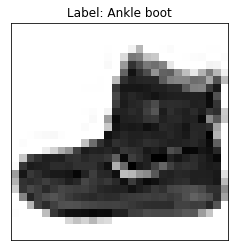

In [90]:
x_train = loadData(trainImages, 60000, isLabel = False) / 255.0
y_train = loadData(trainLabels, 60000)
x_test = loadData(testImages, 10000, isLabel = False) / 255.0
y_test = loadData(testLabels, 10000)

plotImage(x_train, y_train, index = 0)

In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
metr = ['accuracy']

model.compile(optimizer = opt,
              loss = loss_fn,
              metrics = metr)

model.fit(x_train, y_train, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4950 - accuracy: 0.8231
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3696 - accuracy: 0.8656
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3341 - accuracy: 0.8764
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3099 - accuracy: 0.8846
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8912
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.8965
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9000
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9037
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2465 - accuracy: 0.9071
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [92]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8915


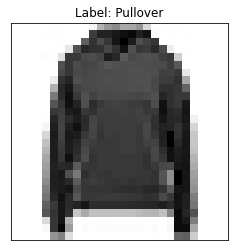

Model Classification:	 Coat


In [93]:
getModelPrediction(x_test, y_test, index = 4021)

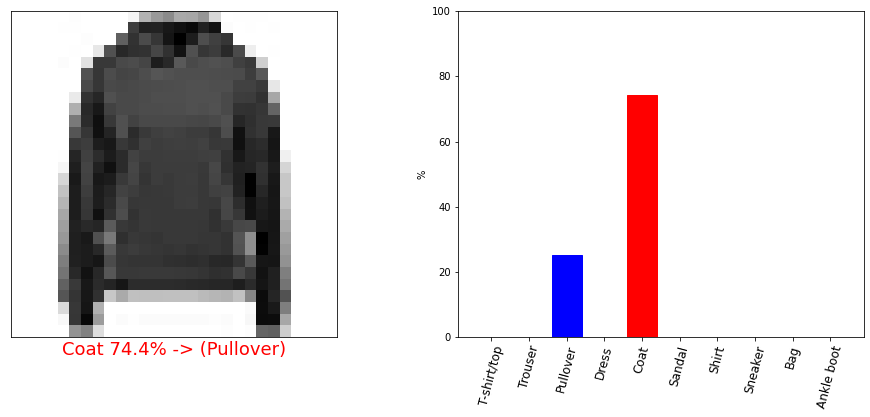

In [99]:
plotConfidence(x_test, y_test, index = 4021)